# Challenge 3: Understanding user and product interaction

Amazon's employee travel provider has asked you to review how user's interact with their online travel website. They store their data in JSON files. Each row in these files lists all the different cities that have been searched for by a user within the same session ( as well as some other info about the user).

## Business Questions:

### There was a bug in the code and one country didn't get logged. Can you guess which country? How?

With this data, the user is based in 1 of 7 countries:
- Unknown [2820 sessions]
- Germany [3638 sessions]
- Spain [1953 sessions]
- France [2298 sessions]
- Italy [1882 sessions]
- United Kingdom [3555 sessions]
- United States [3876 sessions]
(equalling 20,022 total sessions)

My guess of the unknown country is either **Canada** due to the fact that Canadian destinations make up a portion of the search results.

### For each city, find the most likley city to be also searched for within the same session

### Travel sites are browsed by two kinds of users:
### - Users who are actually planning a trip
### - Users who just dream about a vacation
### The first group obviously has a much higher purchasing intent. Users planning a trip often search for cities close to each other, while users who search for cities far away from each other are often just dreaming about a vacation (or a great work trip!). Based on this idea, come up with an algorithm that clusters sessions into two groups: high intent, and low intent

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from utils.utils import*

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
% matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
% load_ext autoreload
% autoreload 2

In [2]:
import json
from pprint import pprint

file_directory = 'data/challenge_3.json'
with open(file_directory) as data_file:    
    data = json.load(data_file)
pprint(data)

[{'cities': ['New York NY, Newark NJ'],
  'session_id': ['X061RFWB06K9V'],
  'unix_timestamp': [1442503708],
  'user': [[{'country': 'UK', 'joining_date': '2015-03-22', 'user_id': 2024}]]},
 {'cities': ['New York NY, Jersey City NJ, Philadelphia PA'],
  'session_id': ['5AZ2X2A9BHH5U'],
  'unix_timestamp': [1441353991],
  'user': [[{'country': 'DE', 'joining_date': '2015-03-28', 'user_id': 2853}]]},
 {'cities': ['San Antonio TX'],
  'session_id': ['SHTB4IYAX4PX6'],
  'unix_timestamp': [1440843490],
  'user': [[{'country': 'UK',
             'joining_date': '2015-03-06',
             'user_id': 10958}]]},
 {'cities': ['Edmonton AB'],
  'session_id': ['JBRB8MZGTX3M4'],
  'unix_timestamp': [1427268063],
  'user': [[{'country': 'IT', 'joining_date': '2015-03-12', 'user_id': 7693}]]},
 {'cities': ['Phoenix AZ, Houston TX'],
  'session_id': ['YJCMPURC2FL9C'],
  'unix_timestamp': [1430559067],
  'user': [[{'country': 'UK', 'joining_date': '2015-02-28', 'user_id': 7506}]]},
 {'cities': ['San Di

In [ ]:
city = data[0]['cities']
session_id = data[0]['session_id']
unix_timestamp = data[0]['unix_timestamp']
country = data[0]['user'][0][0]['country']
joining_date = data[0]['user'][0][0]['joining_date']
user_id = data[0]['user'][0][0]['user_id']

In [3]:
city = []
session_id = []
unix_timestamp = []
country = []
joining_date = []
user_id = []
for i in range(len(data)):
    city.append(data[i]['cities'][0])
    session_id.append(data[i]['session_id'][0])
    unix_timestamp.append(data[i]['unix_timestamp'][0])
    country.append(data[i]['user'][0][0]['country'])
    joining_date.append(data[i]['user'][0][0]['joining_date'])
    user_id.append(data[i]['user'][0][0]['user_id'])

## Country

In [6]:
countries, country_counts = np.unique(country, return_counts=True)

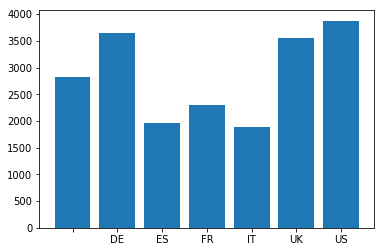

In [7]:
plt.bar(countries, country_counts)
plt.show()

In [8]:
countries, counts

(array(['', 'DE', 'ES', 'FR', 'IT', 'UK', 'US'], dtype='<U2'),
 array([2820, 3638, 1953, 2298, 1882, 3555, 3876]))

## City

In [84]:
a = []
b = np.zeros((20022,11), dtype="S30")
c = np.zeros((b.shape))

for i in range(len(city)):
    a.append(city[i].split(', '))
    
    for j in range(len(a[i])):
        b[i,j] = a[i][j]

c = np.asarray(b, dtype=str)

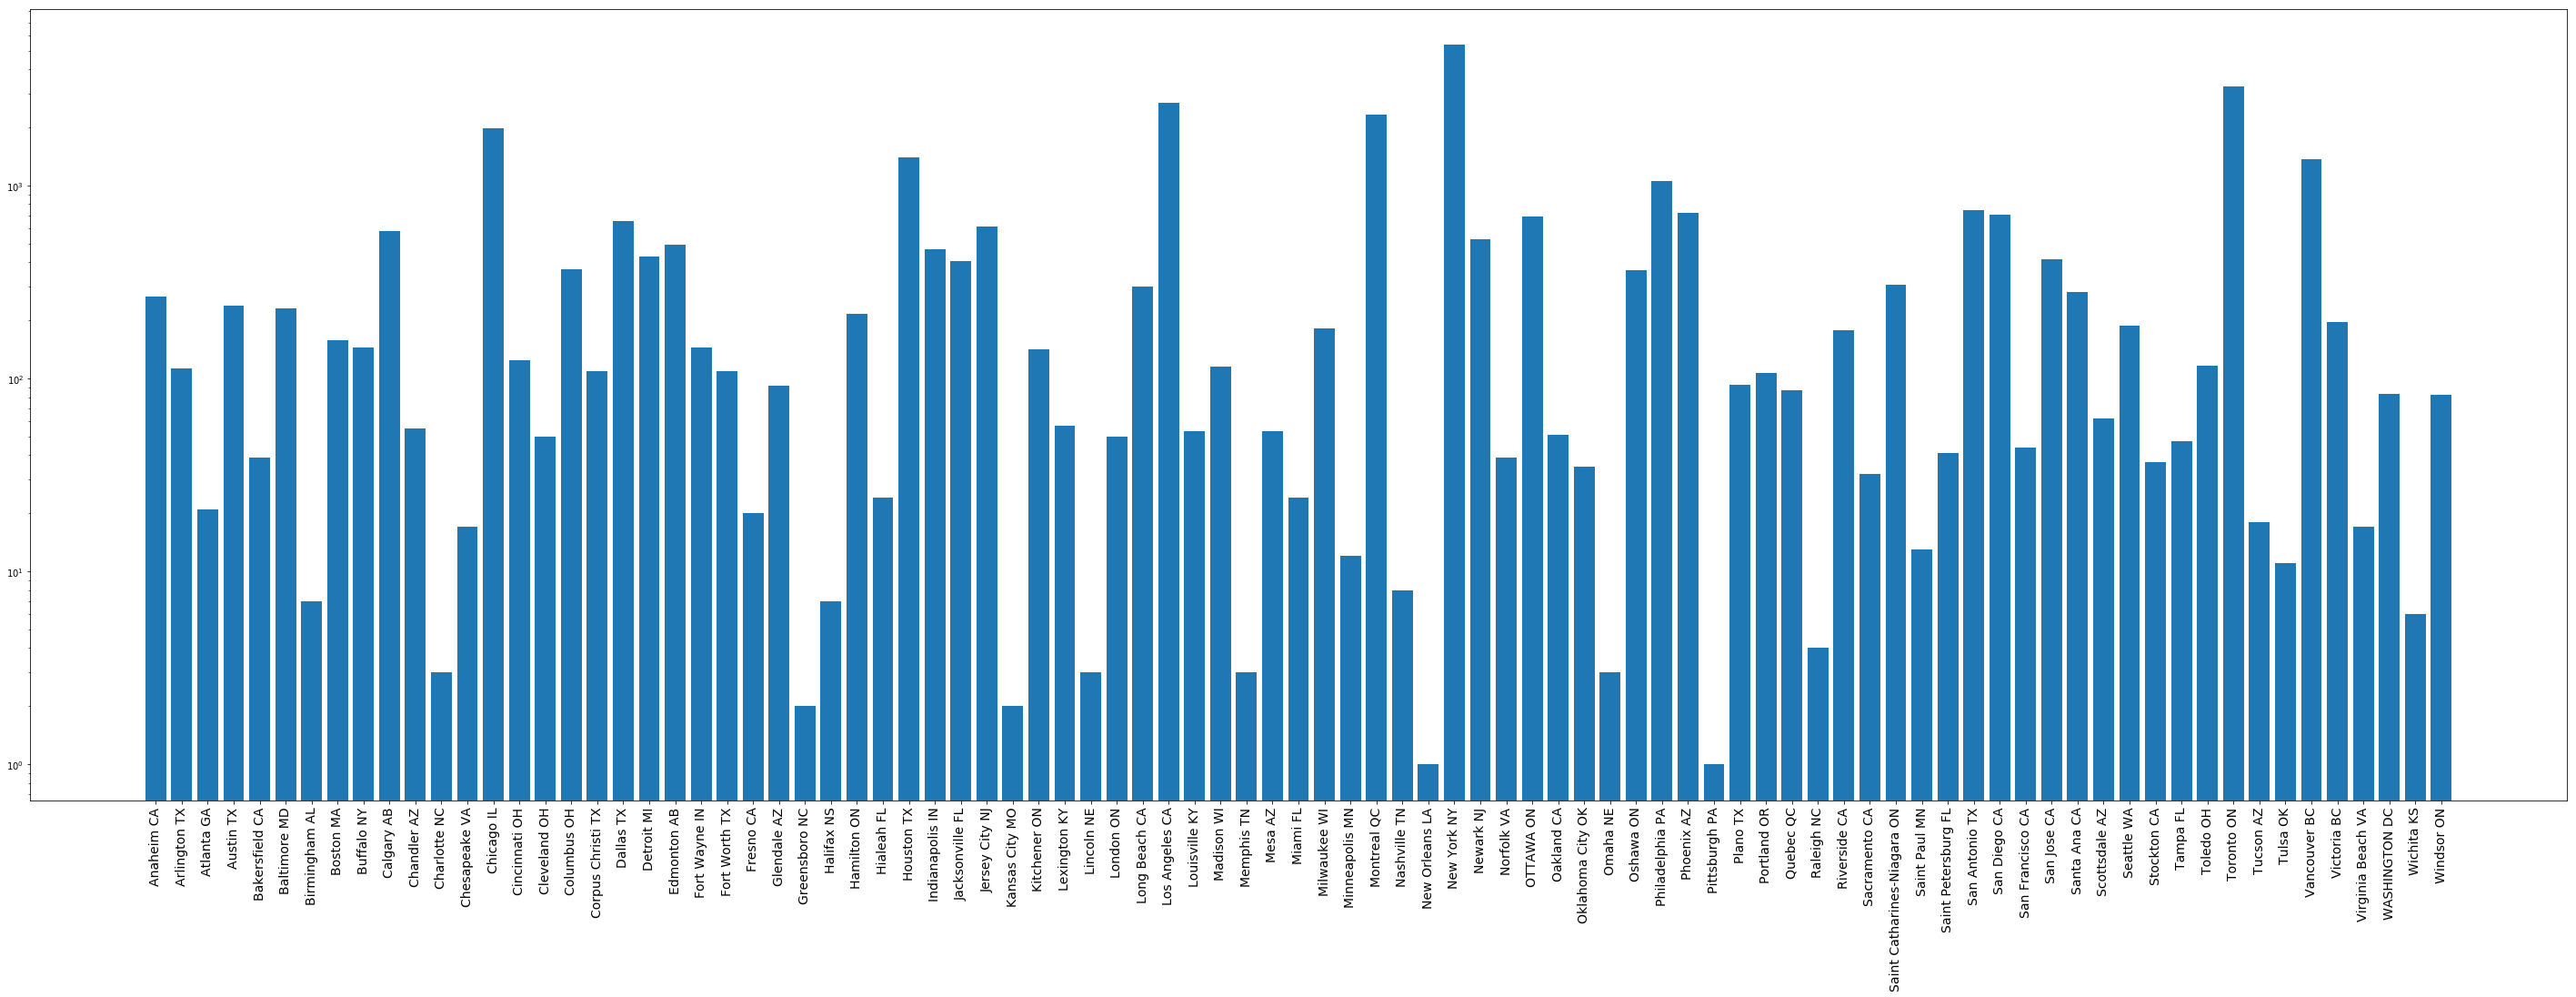

In [85]:
plt.figure(figsize=(50,16))
plt.bar(cities[1:], city_counts[1:], log=True)
plt.xticks(fontsize=14, rotation=90)
plt.show()

In [86]:
cities, city_counts = np.unique(c, return_counts=True)
cities, city_counts

(array(['', 'Anaheim CA', 'Arlington TX', 'Atlanta GA', 'Austin TX',
        'Bakersfield CA', 'Baltimore MD', 'Birmingham AL', 'Boston MA',
        'Buffalo NY', 'Calgary AB', 'Chandler AZ', 'Charlotte NC',
        'Chesapeake VA', 'Chicago IL', 'Cincinnati OH', 'Cleveland OH',
        'Columbus OH', 'Corpus Christi TX', 'Dallas TX', 'Detroit MI',
        'Edmonton AB', 'Fort Wayne IN', 'Fort Worth TX', 'Fresno CA',
        'Glendale AZ', 'Greensboro NC', 'Halifax NS', 'Hamilton ON',
        'Hialeah FL', 'Houston TX', 'Indianapolis IN', 'Jacksonville FL',
        'Jersey City NJ', 'Kansas City MO', 'Kitchener ON', 'Lexington KY',
        'Lincoln NE', 'London ON', 'Long Beach CA', 'Los Angeles CA',
        'Louisville KY', 'Madison WI', 'Memphis TN', 'Mesa AZ', 'Miami FL',
        'Milwaukee WI', 'Minneapolis MN', 'Montreal QC', 'Nashville TN',
        'New Orleans LA', 'New York NY', 'Newark NJ', 'Norfolk VA',
        'OTTAWA ON', 'Oakland CA', 'Oklahoma City OK', 'Omaha NE',
      

19

In [43]:
from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters=2, tol=1e2, init='random', random_state=0).fit(c)
# dict1 = {i: np.where(kmeans1.labels_ == i)[0] for i in range(kmeans1.n_clusters)}

ValueError: could not convert string to float: 'New York NY'